(sec-t-student)=
# Distribución y corrección de t de student

En la {numref}`sec-errorEstandar` se presentó un método para la determinación de la incertidumbre y confiabilidad de una medida, bajo la premisa de que la medida seguía una distribución normal. Como conclusión final se estableció que es posible medir una cantidad física $N$ veces y reportar la incertidumbre de la medida como $s/\sqrt{N}$, con la certeza de que la confiabilidad de la medida está determinada por una distribución normal. Aquí $s$ es la desviación estándar de la muestra. Para poder llegar a esta conclusión se hizo uso del [teorema del límite central](sec-teoremaLC), pero no hemos dicho nada sobre el número de medidas $N$ que se deben hacer para poder decir que la distribución es normal. En general, es aceptado que la distribución es normal si $N \geq 30$. Para un número de medidas inferior a $30$ la aproximación a la distribución normal ya no es tan buena, y por lo tanto se debe aplicar una corrección con el fin de reportar la confiabilidad correcta. Dicha corrección se conoce como *corrección de t-student*.

(subsec-fun-tstudent)=
## Función densidad de probabilidad de t-student

Sean $X_1$, $X_2$, ..., $X_\nu$ y $X$, $\nu$ + 1 variables aleatorias normales con media 0 y desviación estándar $\sigma$, independientes entre si, entonces la variable

$$t_\nu = \frac{X}{\sqrt{\frac{1}{\nu} \sum^\nu X_i^2}} $$

recibe el nombre de t de Student (t-Student) con $\nu$ grados de libertad.

Sea $\chi^2 = X_1^2 + X_2^2 + ... + X_\nu^2$ la suma de $\nu$ variables aleatorias con media 0 y varianza $\sigma^2$, la variable t-Student con $\nu$ grados de libertad se puede escribir como:


$$t_\nu = \frac{X_i/\sigma}{\sqrt{\frac{1}{\nu} \sum^\nu X_i^2/\sigma^2}} = \frac{Z_i}{\sqrt{\frac{1}{\nu} \chi_\nu^2}} ,$$


donde $Z_i = \frac{X_i - \mu}{\sigma}$ es la variable normal *tipificada* con media cero y varianza uno (en este caso con $\mu=0$).

La función de densidad asociada a la distribución t de Student es

$$f(t) = \frac{1}{\sqrt \nu \beta \big (\frac{1}{2},\frac{\nu}{2} \big )} \Big( 1+ \frac{t^2}{\nu} \Big)^{- \frac{\nu + 1}{2}} \ ; \ -\infty < t < \infty$$

donde $\beta(p,q) = \frac{\Gamma(p)\Gamma(q)}{\Gamma(p+q)}$, y $\Gamma$ es la función gamma.

La media y la varianza de la distribución t vienen dadas por $\mu = 0$ y $\sigma_t^2 = \frac{\nu}{\nu-2}$ para $\nu$ > 2. Note que esta distribución solo depende del parámetro $\nu$ y que a medida que este parámetro se hace grande su varianza tiende a la unidad, es decir, la distribución t-Student tiende a la distribución normal tipificada. En la {numref}`fig-tstudent` se presenta una comparación entre la distribución normal y la t-student, para diferente número de mediciones.

```{figure} imagenes/tstudent.svg
:name: fig-tstudent

Comparación distribución normal y t-student. La distribución normal corresponde a la línea azul, los puntos negros corresponden a la distribución de t-student, y la línea discontinua roja es la desviación estándar de la distribución de t-student, presentada a la altura de la desviación estándar de la distribución normal. La gráfica de arriba es para cinco mediciones, y la de abajo para 30 mediciones.
```

```{note}
A continuación se presenta el código para generar la {numref}`fig-tstudent`, desplegando la pestaña.
```

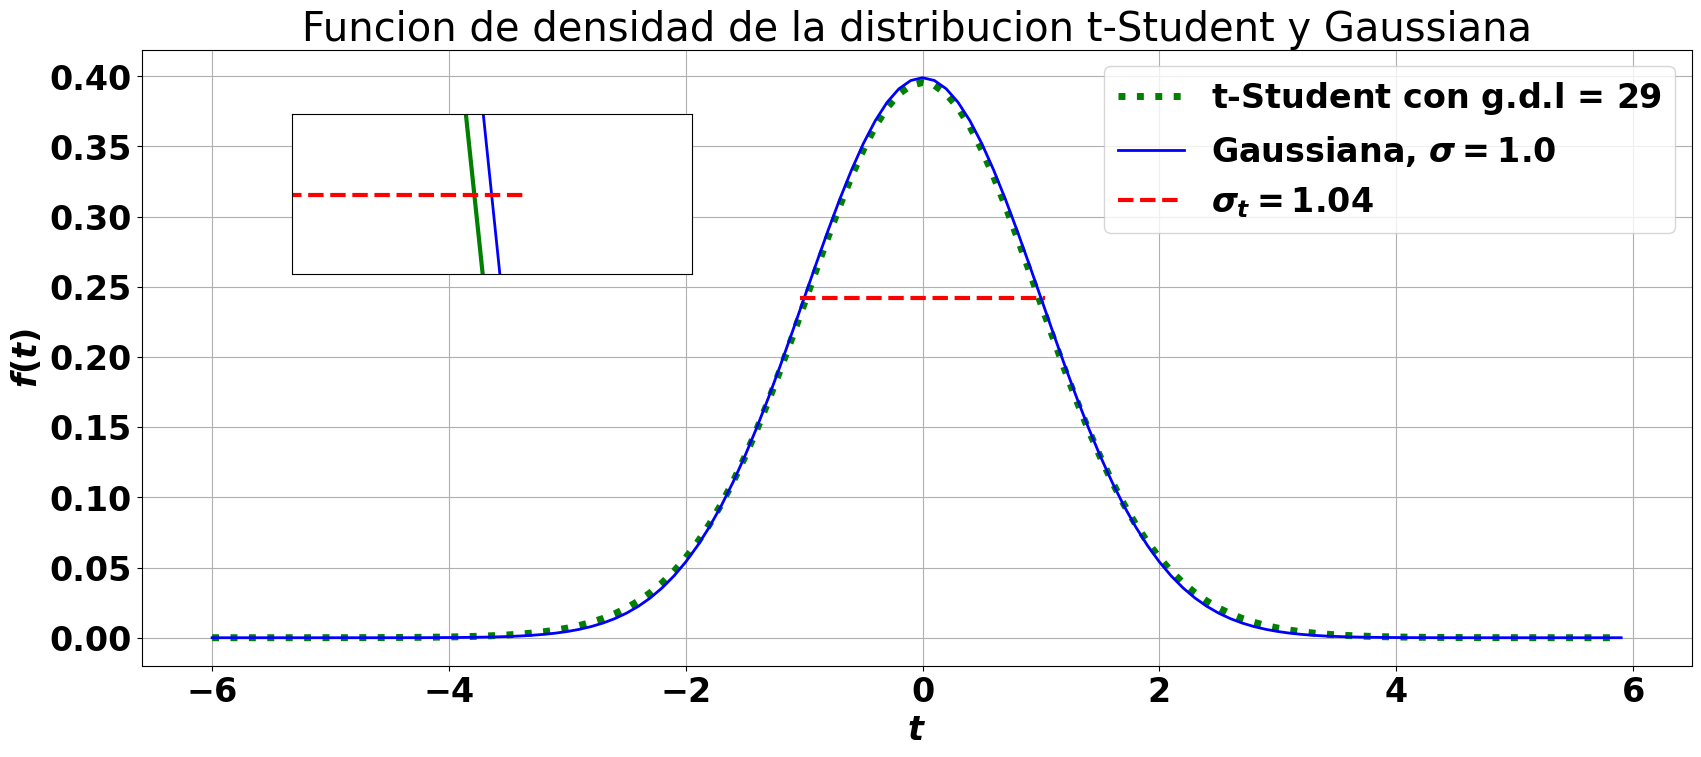

In [1]:
import numpy as np
from scipy import stats
from scipy import special
import pylab as plt

#############
# Variar el número de medidas
N = 30
#############

n = N-1 # grados de libertad 
sigmat = np.sqrt(n/(n-2)) # Inverso Desviación estándar de t
t = np.arange(-6,6,0.1)
beta = (special.gamma(0.5)*special.gamma(n/2))/special.gamma(0.5+n/2)
ft = (1./(np.sqrt(n)*beta))*(1 + t**2/n)**(-(n+1)/2)

mu = 0. # media aritmética
sigma = 1. # desviación estándar
x = np.arange(-6,6,0.1)
f = (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

plt.rcParams['figure.figsize'] = 20, 8
font = {'weight' : 'bold', 'size'   : 24}
plt.rc('font', **font)

plt.figure(4)
plt.plot(t,ft,linewidth=5,linestyle=':',color='green',label='t-Student con g.d.l = $%d$'%n)
plt.plot(x,f,linewidth=2,color='blue',label='Gaussiana, $\sigma = 1.0$')
plt.plot([mu-sigmat, mu+sigmat], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='$\sigma_t = %.2f$' % sigmat)

plt.title('Funcion de densidad de la distribucion t-Student y Gaussiana')
plt.xlabel('$t$',fontsize=24)
plt.ylabel('$f(t)$',fontsize=24)
plt.legend()
plt.grid()

# Gráfica embebida
font = {'weight' : 'bold', 'size'   : 16}
plt.rc('font', **font)
a = plt.axes([0.2, 0.6, .2, .2])
plt.plot(t,ft,linewidth=3,color='green',label='t-Student con n=$%d$' %n)
plt.plot(x,f,linewidth=2,color='blue',label='Gaussiana')
plt.plot([mu-sigmat, mu+sigmat], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='Desv. est. $\sigma$')
plt.xlim(0.8,1.2)
plt.ylim(0.24,0.244)
plt.setp(a, xticks=[], yticks=[])
plt.show()

(subsec-corr-tstudent)=
## Corrección de t de student

Cuando $N < 30$ la desviación estándar de las medias de las muestras puede variar considerablemente por lo que la aproximación $\sigma \approx s/\sqrt{N}$ deja de ser valida. Sea $X$ la variable aleatoria de una distribución normal con media $\mu$ y desviación estándar $\sigma$, se define $Z = \frac{X - \mu}{\sigma}$ como la variable aleatoria normal *tipificada*. Dado que para un experimento la información de la varianza de la población se desconoce, si el tamaño de la muestra $N$ es pequeño se puede tener una idea buena de la media pero no de la varianza. Escribiendo la variable tipificada en términos de la varianza y la media de la muestra, podemos definir una nueva variable

$$t = \frac{\bar{x} - \mu}{s/\sqrt N} . $$ (ec-t1)

Dividiendo y multiplicando por la desviación estándar de la población, reorganizando se tiene

$$t = \bigg(\frac{\bar{x} - \mu}{\sigma/\sqrt{N}}\bigg)\frac{1}{s/\sigma} ,$$

donde el término entre paréntesis corresponde a una variable normal tipificada,

$$t =\frac{z}{s/\sigma} .$$ (ec-t2)

Recordando que la desviación de la muestra se define como 

$$s = \frac{\sqrt{\sum_i^N (\bar{x} - x_i)^2}}{\sqrt{N-1}} ,$$

al dividir por $\sigma$ queda

$$\frac{s}{\sigma} = \frac{\sqrt{\sum_i^N \big(\frac{\bar{x} - x_i}{\sigma}\big)^2}}{\sqrt{N-1}} ,$$

donde la variable $\frac{x_i - \bar{x}}{\sigma}$ es aproximadamente una variable normal tipificada de media cero y varianza uno. Llamando a la sumatoria del cuadrado en el numerador $\chi^2$, se puede escribir 

 $$\frac{S}{\sigma} = \frac{\sqrt{\chi^2}}{\sqrt{N-1}} .$$ (ec-t3)

Igualando las ecuaciones {eq}`ec-t2` y {eq}`ec-t3` se concluye que

 $$t = \frac{z}{\sqrt{\frac{1}{N-1}\chi^2_{N}}} .$$ (ec-t4)

La ecuación {eq}`ec-t4` es aproximadamente la variable de la distribución de t-student para $\nu = N-1$ grados de libertad [^demo], y por lo tanto se puede expresar la probabilidad como:

[^demo]: Una demostración de esto se puede encontrar en la página 138 de {cite}`bonamente2017statistics`.

$$P_t \bigg (-t_{\alpha,\nu} < t < t_{\alpha,\nu} \bigg ) = 1 - \alpha ,$$ (ec-t5)

donde $t_{\alpha,\nu}$ es el estadístico de la variable $t$ para $\nu$ grados de libertad. Reemplazando {eq}`ec-t1` en {eq}`ec-t5` y reorganizando se obtiene la confiabilidad en el valor esperado de la media:

$$P_t \bigg (\bar{x}-t_{\alpha,\nu}\frac{s}{\sqrt N} < \mu < \bar{x}+ t_{\alpha,\nu}\frac{s}{\sqrt N} \bigg ) = 1 - \alpha .$$ (ec-t6)

A continuación se presenta un código que determina el factor de corrección $t_{\alpha,\nu}$, ingresando el número de medidas `N`, el número de ligaduras `l`, y las certezas `unoMalpha` para las que se quiere determinar el factor de corrección. Recordar que el número de grados de libertad (g.d.l) es igual al número de medidas menos las ligaduras. Como ejemplo, se presentan los factores de corrección para siete medidas, una ligadura, y certezas del $68\,\%$, $95\,\%$ y $99.7\,\%$:

In [2]:
### Certezas #####################
N = 7     # Número de medidas
l = 1    # Número de ligaduras. El valor típico es uno porque se necesita la media para determinar la desviación estándar
unoMalpha = ['  ',0.68,0.95,0.997]   # certezas para determinar el factor de corrección
##################################


from tabulate import tabulate, SEPARATING_LINE
import numpy as np
from scipy import stats

table = [['g.d.l.','  ','Certeza','  '],unoMalpha,SEPARATING_LINE]

gdl = N - l
probs = [gdl]
for ii, val in enumerate(unoMalpha[1::]):
    aux = stats.t.interval(val,gdl,loc=0,scale=1) # loc sirve para desplazar la distribución, scale para escalarla.
    probs.append(round(aux[1],4))
table.append(probs)

print(tabulate(table,tablefmt='simple'))

------  -----  -------  ------
g.d.l.         Certeza
        0.68   0.95     0.997
------  -----  -------  ------
6       1.084  2.4469   4.8002
------  -----  -------  ------


**Ejemplo**

En el ejemplo de la {numref}`subsec-estimacionEjemplo1b` se encontró el valor del tiempo de caída $(0.486 \pm 0.013)\,\text{s}$ luego de realizar $7$ medidas con una confiabilidad del $68\,\%$. Esta confiabilidad suponía una distribución normal. No obstante, siete medidas es muy poco para poder garantizar que se determinó con precisión la incertidumbre estándar, por lo que se debe multiplicar por el factor de corrección de t-student. Para $7$ medidas, una ligadura, y una confiabilidad del $68\,\%$, el factor de corrección es $t_{0.32,6} = 1.084$. Por lo tanto, el valor correcto a reportar es $(0.486 \pm 0.014)\,\text{s}$.

Si además, se tiene en cuenta la incertidumbre del cronómetro ({numref}`subsubsec-gum-combinacionError`), la incertidumbre combinada es

$$ \alpha_c = \sqrt{(0.014\,\text{s})^2 + (0.004\,\text{s})^2} = 0.01456\,\text{s} ,$$

y el valor correcto de tiempo a reportar será

$$ t = (0.486 \pm 0.015)\,\text{s} .$$

```{seealso}

Para leer más sobre t-student mirar las sección 8.8 de {cite}`Hughes2010`, o la sección 1.4.3 de {cite}`Mahecha2009`.

```